In [36]:
import random
import numpy as np
import matplotlib.pyplot as plt
import tqdm.notebook as tq

Matching pennies game from basic game theory.

In [85]:
games = 10**7

past_a = [ 0 ]*games
past_b = [ 0 ]*games
wins = [ 0 ]*games

A = 0 if random.uniform(0,1) < 0.5 else 1
B = 1 if random.uniform(0,1) < 0.5 else 0

past_a[0] = A
past_b[0] = B

wins[0] = 0 if A == B else 1

for game in tq.trange(1,games):   
    A = 0 if random.uniform(0,1) < past_b[game-1] else 1
    B = 1 if random.uniform(0,1) < past_a[game-1] else 0
    
    past_a[game] = (A + past_a[game-1]*game)/(game+1)
    past_b[game] = (B + past_b[game-1]*game)/(game+1)
    wins[game] = ( (A != B)*1 + wins[game-1]*game)/(game+1)

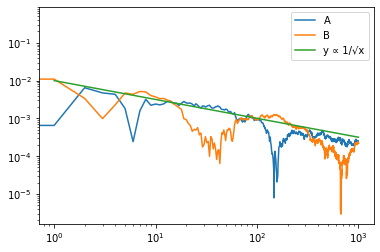

In [86]:
jump = max(1,games//10**3)

plt.plot(abs(np.array(past_a[::jump])-0.5), label = 'A')
plt.plot(abs(np.array(past_b[::jump])-0.5), label = 'B')
#plt.plot(wins[::jump], label = 'wins '+str(jump))
#plt.plot([0.5]*len(past_a[::jump]))
#plt.ylim([0.495,0.505])
plt.plot(np.linspace(1,len(past_a[::jump])),np.linspace(1,len(past_a[::jump]))**-0.5/100, label='y ∝ 1/√x')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()